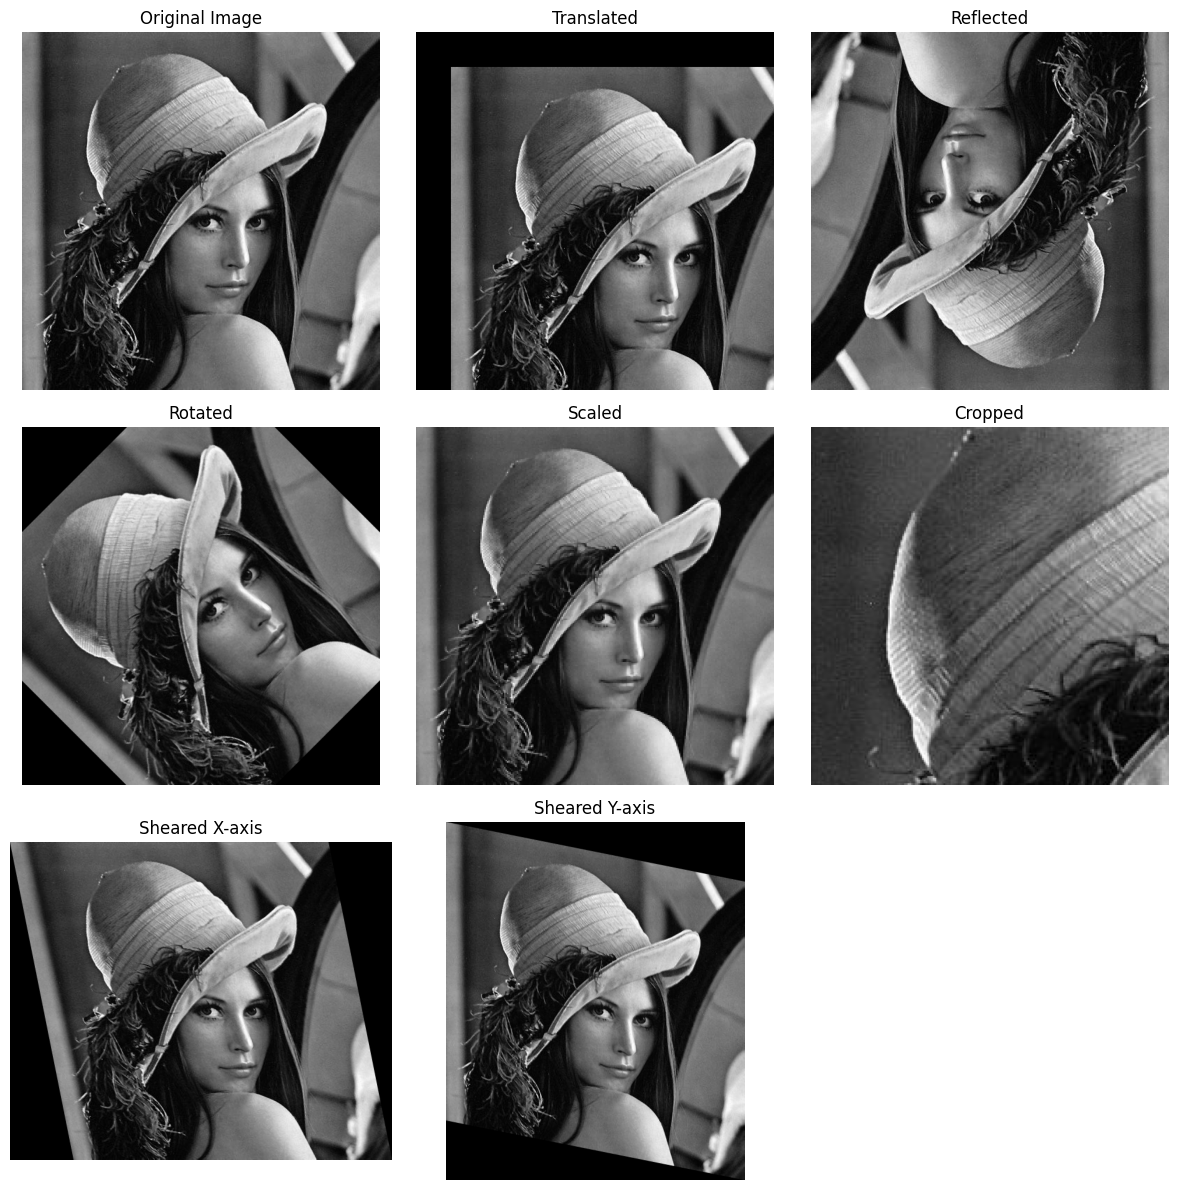

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the uploaded image
image_path = 'img1.jpg'
image = cv2.imread(image_path, cv2.IMREAD_COLOR)

# Verify if the image is loaded successfully
if image is None:
    raise ValueError("Error: Image could not be loaded. Check the file path.")

# Convert to RGB for proper visualization
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Image Translation
def translate_image(img, tx, ty):
    rows, cols = img.shape[:2]
    M = np.float32([[1, 0, tx], [0, 1, ty]])
    translated = cv2.warpAffine(img, M, (cols, rows))
    return translated

# Image Reflection
def reflect_image(img, axis):
    if axis == 'x':  # Reflect across x-axis
        reflected = cv2.flip(img, 0)
    elif axis == 'y':  # Reflect across y-axis
        reflected = cv2.flip(img, 1)
    elif axis == 'xy':  # Reflect across both axes
        reflected = cv2.flip(img, -1)
    return reflected

# Image Rotation
def rotate_image(img, angle):
    rows, cols = img.shape[:2]
    M = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    rotated = cv2.warpAffine(img, M, (cols, rows))
    return rotated

# Image Scaling
def scale_image(img, fx, fy):
    scaled = cv2.resize(img, None, fx=fx, fy=fy, interpolation=cv2.INTER_LINEAR)
    return scaled

# Image Cropping
def crop_image(img, x_start, y_start, width, height):
    cropped = img[y_start:y_start + height, x_start:x_start + width]
    return cropped

# Image Shearing (x-axis)
def shear_image_x(img, shx):
    rows, cols = img.shape[:2]
    M = np.float32([[1, shx, 0], [0, 1, 0]])
    sheared = cv2.warpAffine(img, M, (cols + int(rows * abs(shx)), rows))
    return sheared

# Image Shearing (y-axis)
def shear_image_y(img, shy):
    rows, cols = img.shape[:2]
    M = np.float32([[1, 0, 0], [shy, 1, 0]])
    sheared = cv2.warpAffine(img, M, (cols, rows + int(cols * abs(shy))))
    return sheared

# Apply transformations
translated = translate_image(image, 50, 50)
reflected = reflect_image(image, 'xy')
rotated = rotate_image(image, 45)
scaled = scale_image(image, 0.5, 0.5)
cropped = crop_image(image, 50, 50, 200, 200)
sheared_x = shear_image_x(image, 0.2)
sheared_y = shear_image_y(image, 0.2)

# Plot all transformations
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
axes[0, 0].imshow(image)
axes[0, 0].set_title("Original Image")

axes[0, 1].imshow(translated)
axes[0, 1].set_title("Translated")

axes[0, 2].imshow(reflected)
axes[0, 2].set_title("Reflected")

axes[1, 0].imshow(rotated)
axes[1, 0].set_title("Rotated")

axes[1, 1].imshow(scaled)
axes[1, 1].set_title("Scaled")

axes[1, 2].imshow(cropped)
axes[1, 2].set_title("Cropped")

axes[2, 0].imshow(sheared_x)
axes[2, 0].set_title("Sheared X-axis")

axes[2, 1].imshow(sheared_y)
axes[2, 1].set_title("Sheared Y-axis")

for ax in axes.flat:
    ax.axis("off")

plt.tight_layout()
plt.show()


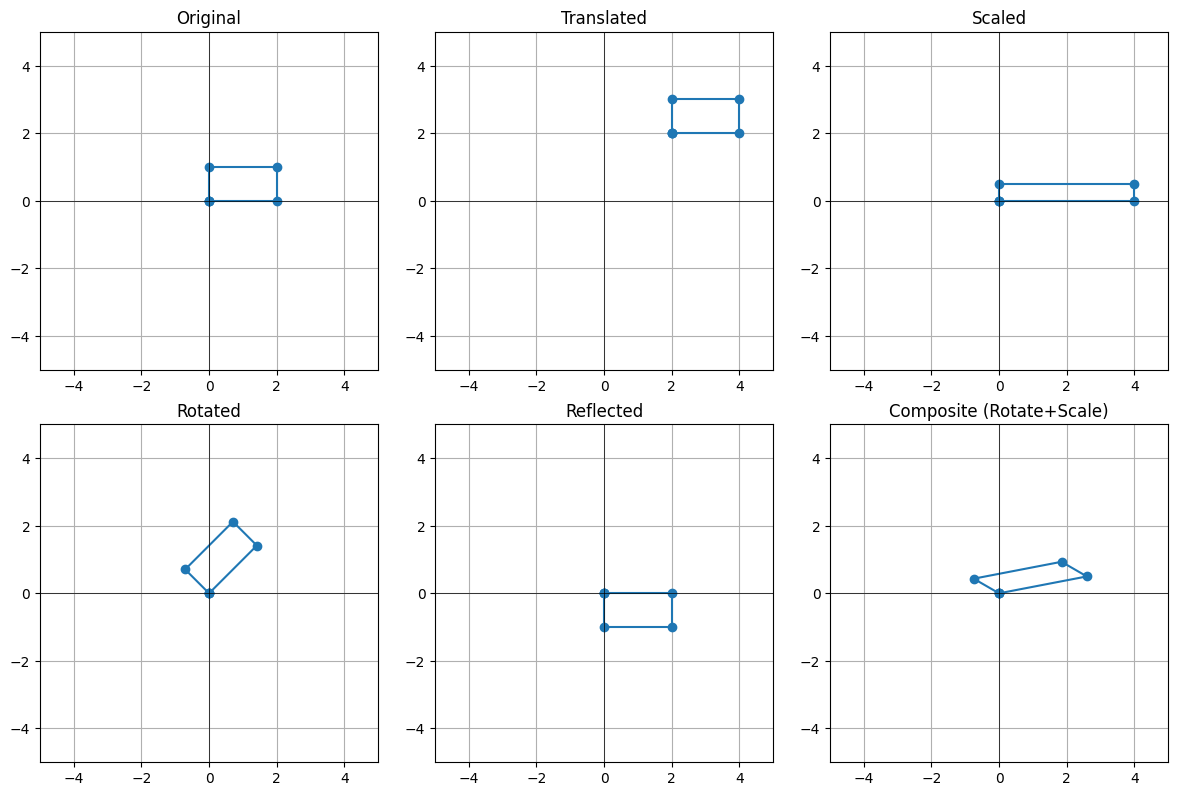

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define a 2D object: A rectangle (polygon)
rectangle = np.array([[0, 0], [2, 0], [2, 1], [0, 1], [0, 0]])

# Function to plot the object
def plot_polygon(polygon, title, ax):
    polygon = np.vstack([polygon, polygon[0]])  # Close the polygon
    ax.plot(polygon[:, 0], polygon[:, 1], marker='o')
    ax.set_title(title)
    ax.set_aspect('equal', adjustable='box')
    ax.grid(True)
    ax.axhline(0, color='black',linewidth=0.5)
    ax.axvline(0, color='black',linewidth=0.5)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)

# Define transformation functions
def translate(polygon, tx, ty):
    T = np.array([[1, 0, tx],
                  [0, 1, ty],
                  [0, 0, 1]])
    polygon_h = np.hstack([polygon, np.ones((polygon.shape[0], 1))])
    transformed = (T @ polygon_h.T).T
    return transformed[:, :2]

def scale(polygon, sx, sy):
    S = np.array([[sx, 0, 0],
                  [0, sy, 0],
                  [0,  0, 1]])
    polygon_h = np.hstack([polygon, np.ones((polygon.shape[0], 1))])
    transformed = (S @ polygon_h.T).T
    return transformed[:, :2]

def rotate(polygon, angle):
    rad = np.radians(angle)
    R = np.array([[np.cos(rad), -np.sin(rad), 0],
                  [np.sin(rad),  np.cos(rad), 0],
                  [0,           0,           1]])
    polygon_h = np.hstack([polygon, np.ones((polygon.shape[0], 1))])
    transformed = (R @ polygon_h.T).T
    return transformed[:, :2]

def reflect(polygon, axis):
    if axis == 'x':
        R = np.array([[1, 0, 0],
                      [0, -1, 0],
                      [0,  0, 1]])
    elif axis == 'y':
        R = np.array([[-1, 0, 0],
                      [0, 1, 0],
                      [0, 0, 1]])
    polygon_h = np.hstack([polygon, np.ones((polygon.shape[0], 1))])
    transformed = (R @ polygon_h.T).T
    return transformed[:, :2]

def shear(polygon, shx, shy):
    Sh = np.array([[1, shx, 0],
                   [shy, 1, 0],
                   [0,  0,  1]])
    polygon_h = np.hstack([polygon, np.ones((polygon.shape[0], 1))])
    transformed = (Sh @ polygon_h.T).T
    return transformed[:, :2]

# Composite transformation: Rotation followed by scaling
def composite_transform(polygon):
    rad = np.radians(30)  # Rotate by 30 degrees
    R = np.array([[np.cos(rad), -np.sin(rad), 0],
                  [np.sin(rad),  np.cos(rad), 0],
                  [0,           0,           1]])
    S = np.array([[1.5, 0, 0],  # Scale by 1.5
                  [0, 0.5, 0],
                  [0, 0, 1]])
    T = S @ R  # Composite transformation matrix
    polygon_h = np.hstack([polygon, np.ones((polygon.shape[0], 1))])
    transformed = (T @ polygon_h.T).T
    return transformed[:, :2]

# Apply transformations
translated = translate(rectangle, 2, 2)
scaled = scale(rectangle, 2, 0.5)
rotated = rotate(rectangle, 45)
reflected = reflect(rectangle, 'x')
sheared = shear(rectangle, 0.5, 0.2)
composite = composite_transform(rectangle)

# Plot all transformations
fig, axes = plt.subplots(2, 3, figsize=(12, 8))
plot_polygon(rectangle, "Original", axes[0, 0])
plot_polygon(translated, "Translated", axes[0, 1])
plot_polygon(scaled, "Scaled", axes[0, 2])
plot_polygon(rotated, "Rotated", axes[1, 0])
plot_polygon(reflected, "Reflected", axes[1, 1])
plot_polygon(composite, "Composite (Rotate+Scale)", axes[1, 2])

plt.tight_layout()
plt.show()